## Groceries Dataset: Apriori Analysis

In [1]:
# Loading libraries

import pandas as pd

In [2]:
# Reading data & preview

df_groceries = pd.read_csv('Data/groceries.csv')
df_groceries.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
# Total number of customers/orders

df_groceries.Member_number.nunique()

3898

In [4]:
# Total number of items

df_groceries.itemDescription.nunique()

167

In [5]:
# Item counts graphical

products = df_groceries.itemDescription.value_counts()
products = products.sort_values(ascending = False) 
products = products[:10]

# List of all products

all_products = df_groceries.itemDescription.unique()

In [6]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

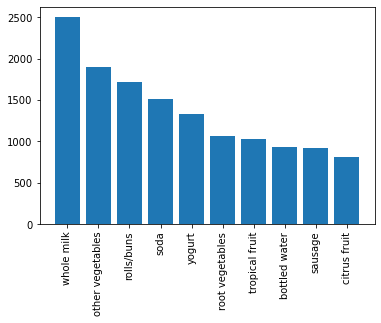

In [7]:
plt.bar(products.index, products.values)
plt.xticks(rotation = 90)

In [8]:
# One-Hot Encoding
one_hot = pd.get_dummies(df_groceries.itemDescription)

# Droping original items column
df_groceries.drop('itemDescription', inplace = True, axis = 1)

# Joining encoded with master
df_groceries = df_groceries.join(one_hot)

# Previewing encoded dataset
df_groceries.head()

,Member_number,Date,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,05-01-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,19-09-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,12-12-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,01-02-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
# Extracting transactions

transactions = df_groceries.groupby(['Member_number', 'Date'])[all_products[:]].apply(sum)
transactions.head()

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          15-03-2015               0           1          0   
              24-06-2014               0           1          0   
              24-07-2015               0           0          0   
              25-11-2015               0           0          0   
              27-05-2015               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          15-03-2015                 0           0           0   
              24-06-2014                 0           0           0   
              24-07-2015                 0           0           0   
              25-11-2015                 0           0           0   
              27-05-2015                 0           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          15-03-2015             0     0            0        0  ...   
              24-06-2014             0     0            0        0  ...   
              24-07-2015             0     0            0        0  ...   
              25-11-2015             0     0            0        0  ...   
              27-05-2015             0     0            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          15-03-2015               0     0    0               0   
              24-06-2014               0     0    0               0   
              24-07-2015               0     0    0               0   
              25-11-2015               0     0    0               0   
              27-05-2015               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          15-03-2015                     0               0            0   
              24-06-2014                     0               0            0   
              24-07-2015                     0               0            0   
              25-11-2015                     0               0            0   
              27-05-2015                     0               0            0   

                          make up remover  toilet cleaner  \
Member_number Date                                          
1000          15-03-2015                0               0   
              24-06-2014                0               0   
              24-07-2015                0               0   
              25-11-2015                0               0   
              27-05-2015                0               0   

                          preservation products  
Member_number Date                               
1000          15-03-2015                      0  
              24-06-2014                      0  
              24-07-2015                      0  
              25-11-2015                      0  
              27-05-2015                      0  

[5 rows x 167 columns]

In [10]:
# Restting transaction dataset index

transactions = transactions.reset_index()[all_products]

In [11]:
## Replacing non-zero values with product names
def get_product_names(x):
    for product in all_products:
        if x[product] > 0:
            x[product] = product
    return x

transactions = transactions.apply(get_product_names, axis=1)
transactions.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
## Removing zeros
x = transactions.values
x = [sub[~(sub == 0)].tolist() for sub in x if sub[sub != 0].tolist()]
purchases = x

In [13]:
purchases[0:10]

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [14]:
# Association Rules
from apyori import apriori

rules = apriori(purchases, min_support = 0.0003,
                min_confidance = 0.2,
                min_lift = 3,
                min_length = 2)
association_results = list(rules)

In [15]:
# Storing finidngs into dataframe

df_results = pd.DataFrame(columns = ['Rule', 'Support', 'Confidence', 'Lift'])

for item in association_results:

    pair = item[0] 
    items = [x for x in pair]
    
    df_results = df_results.append({'Rule': items[0] + ' > ' + items[1], 
                                    'Support' : str(item[1]), 
                                    'Confidence' : str(item[2][0][2]), 
                                    'Lift' : str(item[2][0][3])}, ignore_index = True)

# Converting column types to Float
df_results[['Support', 'Confidence', 'Lift']] = df_results[['Support', 'Confidence', 'Lift']].astype(float)

# Sorting by Lift
df_results = df_results.sort_values('Lift', ascending = False)

In [16]:
df_results

,Rule,Support,Confidence,Lift
6,soups > seasonal products,0.000334,0.047170,14.704206
10,canned beer > brown bread,0.000334,0.008881,6.644316
16,yogurt > soda,0.000401,0.033333,5.732950
33,pastry > other vegetables,0.000334,0.006460,5.685895
21,curd > fruit/vegetable juice,0.000334,0.009921,5.497869
22,curd > margarine,0.000334,0.009921,5.301516
15,canned beer > whole milk,0.000401,0.008547,4.918803
13,canned beer > yogurt,0.000334,0.019011,4.904615
25,pip fruit > ice cream,0.000334,0.022026,4.453804
11,canned beer > brown bread,0.000401,0.010657,4.309827
